In [16]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv('Final_Dataset.csv',sep=' ')
df.head()

,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
0,0,3,3,2,12.0,0.0,0.0,0.0,0.0,0.0,...,20676.000000,21980.000000,24681.0,0.1992,0.8608,0.54012,0.461533,0.27298,0.4633,0.0141
1,0,2,2,1,41.0,0.0,1.0,0.0,0.0,0.0,...,21999.500000,24233.000000,24231.0,0.6050,0.6538,0.54440,0.230767,0.20630,0.3058,0.3604
2,0,2,3,2,32.0,1.0,0.0,0.0,0.0,0.0,...,23323.000000,26486.000000,23781.0,0.9048,0.4468,0.54860,0.000000,0.25940,0.9249,0.1294
3,0,3,4,3,12.0,0.0,0.0,0.0,0.0,0.0,...,23408.000000,27628.000000,23331.0,0.6922,0.4400,0.55280,0.125000,0.31250,0.7304,0.6109
4,0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,23832.666667,26274.333333,22881.0,0.4928,0.4823,0.55700,0.250000,0.36560,0.2128,0.2896


In [18]:
# Compute the correlation matrix
corr = features.corr()

In [19]:
df.shape

(7583, 108)

In [20]:
features=df[['HCM2','SAT_AVG_ALL','UGDS','PPTUG_EF','CURROPER','NPT4_PUB','NPT4_PRIV','PCTPELL','PCTFLOAN','UG25ABV','ACTCMMID','CONTROL']]
target=df[['RET_FT4']]

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

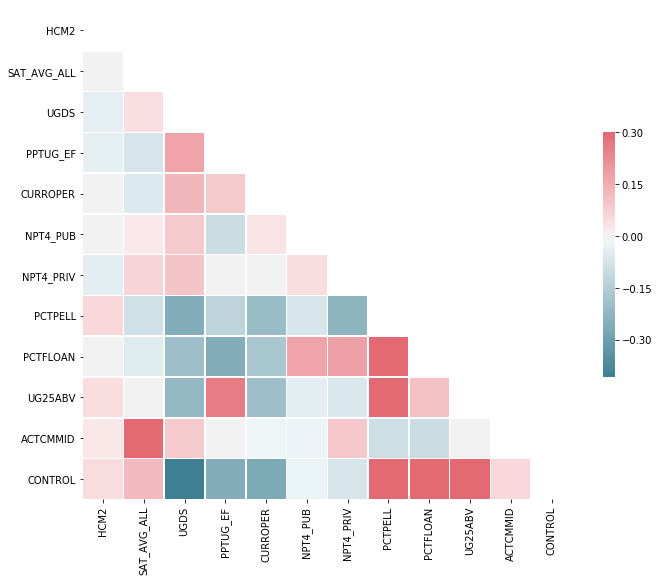

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
# Dropping PCTPELL ,ACTCMMID, CONTROL, UG25ABV
features=df[['HCM2','SAT_AVG_ALL','UGDS','PPTUG_EF','CURROPER','NPT4_PUB','NPT4_PRIV','PCTFLOAN']]

In [24]:
## Without a constant
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(target, features).fit()
predictions = model.predict(features) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RET_FT4   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        17:24:17   Log-Likelihood:                 2106.7
No. Observations:                7583   AIC:                            -4197.
Df Residuals:                    7575   BIC:                            -4142.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
HCM2            0.0088      0.022      0.399      0.690      -0.034       0.052
SAT_AVG_ALL     0.0005   8.61e-06     52.407      0.000       0.000       0.000
UGDS         3.593e-06   4.25e-07      8.451      0.000    2.76e-06    4.43e-06
PPTUG_EF        0.0049      0.009      0.553      0.580      -0.012       0.022
CURROPER        0.1171      0.007     17.847      0.000       0.104       0.130
NPT4_PUB     5.414e-06   4.96e-07     10.921      0.000    4.44e-06    6.39e-06
NPT4_PRIV    2.966e-06    3.2e-07      9.281      0.000    2.34e-06    3.59e-06
PCTFLOAN       -0.0565      0.008     -6.842      0.000      -0.073      -0.040
==============================================================================
Omnibus:                     1448.352   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3154.107
Skew:                          -1.107   Prob(JB):                         0.00
Kurtosis:                       5.253   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Trying other approaches for Linear Regression

In [30]:
z=df[['RET_FT4']].mean()
a=pd.DataFrame(z,dtype=float)
c=a.iloc[0,0]

In [31]:
df[['RET_FT4']]=np.nan
df[['RET_FT4']]=df[['RET_FT4']].fillna(c)
Dummy_Predictions=df[['RET_FT4']]

In [32]:
## Without a constant
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(Dummy_Predictions, features).fit()
predictions = model.predict(features) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RET_FT4   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.217e+05
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        18:03:52   Log-Likelihood:                 10565.
No. Observations:                7583   AIC:                        -2.111e+04
Df Residuals:                    7575   BIC:                        -2.106e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
HCM2            0.0029      0.007      0.402      0.688      -0.011       0.017
SAT_AVG_ALL     0.0005   2.82e-06    176.689      0.000       0.000       0.001
UGDS        -6.493e-07   1.39e-07     -4.659      0.000   -9.23e-07   -3.76e-07
PPTUG_EF        0.0495      0.003     17.028      0.000       0.044       0.055
CURROPER        0.0643      0.002     29.884      0.000       0.060       0.069
NPT4_PUB     1.917e-06   1.62e-07     11.797      0.000     1.6e-06    2.24e-06
NPT4_PRIV    1.252e-06   1.05e-07     11.949      0.000    1.05e-06    1.46e-06
PCTFLOAN        0.0571      0.003     21.101      0.000       0.052       0.062
==============================================================================
Omnibus:                      273.813   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.153
Skew:                          -0.421   Prob(JB):                     7.48e-73
Kurtosis:                       3.586   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
x = features.loc[:, :].values

# Separating out the target
y = target.loc[:,:].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [38]:
finalDf = pd.concat([principalDf, target], axis = 1)

In [48]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [49]:
# Create training and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [50]:
# Create the regressor: reg_all

reg_all = LinearRegression()

In [51]:
# Fit the regressor to the training data

reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(reg_all.score(X_train, y_train))

0.08495853206257109


In [16]:
# Predict on the test data: y_pred

y_pred = reg_all.predict(X_test)

 

# Compute and print R^2 and RMSE

print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.14344831952866588
Root Mean Squared Error: 0.17576847970333323


ValueError: x and y must be the same size

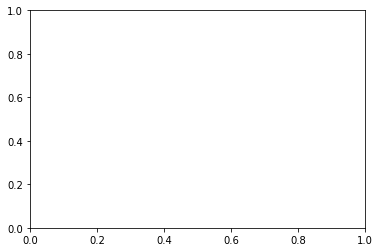

In [17]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()